## Друга частина

У другій частині попереднього домашнього завдання ми вирішували диференціальні рівняння та будували графіки. Продовжуємо працювати над цією домашньою роботою далі.

Необхідно методом найменших квадратів:

- для набору даних графіка функції $S(t)$ отримати рівняння виду $ S(t)=S_0*e^{-\alpha t} $
- для набору даних графіка функції $I(t)$ отримати рівняння виду $ I(t)=(I_0 + \alpha S_0 t)e^{-\alpha t}$ 

Для рівняння $R(t)$ графік функції буде $R(t)=N−S(t)−I(t)$

- Побудувати всі три графіки $S(t)$, $I(t)$ і $R(t)$ на одній області відображення, отримані методом найменших квадратів
- Знайти час $t_{max}$, за якого кількість інфекційних індивідів максимальна. Потрібно за допомогою методу `minimize_scalar` знайти, коли функція $I(t)$ досягає свого максимуму.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from scipy.optimize import leastsq, curve_fit, minimize_scalar

In [2]:
alpha = 0.5
beta = 0.3
N = 1000000
S = 990000
I = 7000
R = 3000
t0,tf = 0, 25

In [3]:
def dSdt(t, S):
    return -alpha * S

In [4]:
sol_sus = solve_ivp(dSdt, (t0, tf), [S], dense_output=True)
sol_sus

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 98
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000002B41359E790>
   status: 0
  success: True
        t: array([ 0.        ,  0.11486984,  1.26356819,  3.06043758,  4.8157449 ,
        6.57363058,  8.33135596, 10.08909132, 11.84682607, 13.60456089,
       15.36229578, 17.12003086, 18.87776637, 20.63550293, 22.39324202,
       24.15098721, 25.        ])
 t_events: None
        y: array([[9.90000000e+05, 9.34741505e+05, 5.26338915e+05, 2.14449863e+05,
        8.92016780e+04, 3.70563463e+04, 1.53952532e+04, 6.39600686e+03,
        2.65724217e+03, 1.10395999e+03, 4.58643792e+02, 1.90545047e+02,
        7.91625391e+01, 3.28883086e+01, 1.36635268e+01, 5.67652784e+00,
        3.71298656e+00]])
 y_events: None

**Необхідно методом найменших квадратів для набору даних графіка функції $S(t)$ отримати рівняння виду $ S(t)=S_0*e^{-\alpha t} $**

In [5]:
t = np.linspace(t0, tf, 1000)

In [6]:
def St(t, alp):
    return S * np.exp(-alp*t)

In [7]:
def diff_St(p0, y1, t):
    alp = p0
    return y1 - St(t, alp)

In [8]:
y1 = np.array(S * np.exp(-alpha * t))
aprx1, _ = leastsq(diff_St, (0.5, ), args=(y1, t))
y1_aprx = np.array(S * np.exp(-aprx1 * t))

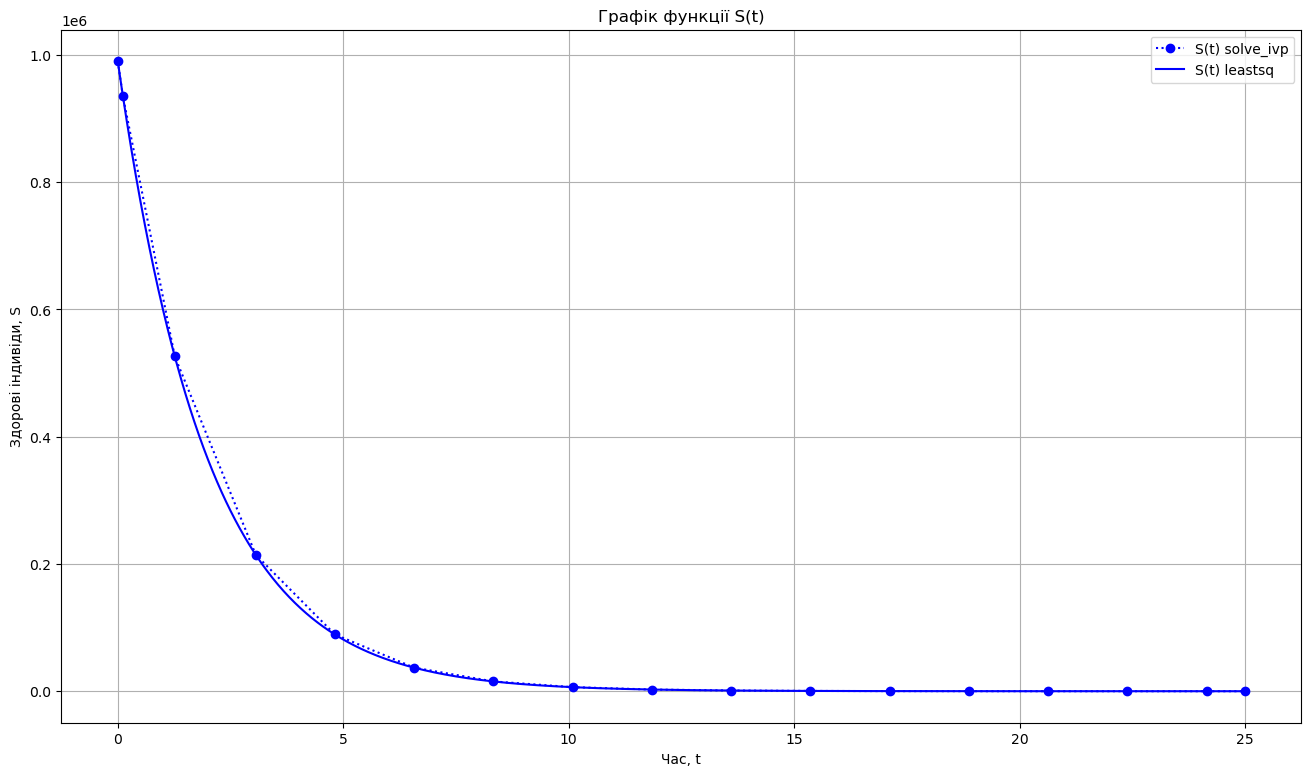

In [9]:
plt.figure(figsize=(16, 9))
plt.plot(sol_sus.t, sol_sus.y[0], 'bo:', label = 'S(t) solve_ivp' )
plt.plot(t, y1_aprx, 'b', label = 'S(t) leastsq' )
plt.grid()
plt.title('Графік функції S(t)')
plt.ylabel('Здорові індивіди, S')
plt.xlabel('Час, t')
plt.legend();

***

In [10]:
def dIdt(t, I):
    return alpha * sol_sus.sol(t) - beta * I

In [11]:
sol_inf = solve_ivp(dIdt, (t0, tf), [I], dense_output=True)
sol_inf

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 80
     njev: 0
      nlu: 0
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000002B414B66250>
   status: 0
  success: True
        t: array([0.00000000e+00, 1.42016636e-02, 1.56218300e-01, 1.46534293e+00,
       3.30463452e+00, 5.49012015e+00, 8.32920731e+00, 1.14496758e+01,
       1.45701443e+01, 1.76449222e+01, 2.06395417e+01, 2.36032033e+01,
       2.50000000e+01])
 t_events: None
        y: array([[  7000.        ,  13960.24492701,  79326.36974353,
        409578.08334945, 446699.01195032, 319077.83026358,
        165571.99129925,  71966.74863389,  29712.58392708,
         12130.57394067,   5009.75291427,   2075.26330119,
          1367.85128541]])
 y_events: None

**Необхідно методом найменших квадратів для набору даних графіка функції $I(t)$ отримати рівняння виду $ I(t)=(I_0 + \alpha S_0 t)e^{-\alpha t}$**

In [12]:
def It(t, alp):
    return (I + alp * S * t) * np.exp(-alp * t)

In [13]:
def diff_It(p0, y2, t):
    alp = p0
    return y2 - It(t, alp)

In [14]:
y2 = np.array((I + alpha * S * t) * np.exp(-alpha * t))
aprx2, _ = leastsq(diff_It, (0.5, ), args=(y2, t))
y2_aprx = np.array((I + alpha * S * t) * np.exp(-aprx2 * t))

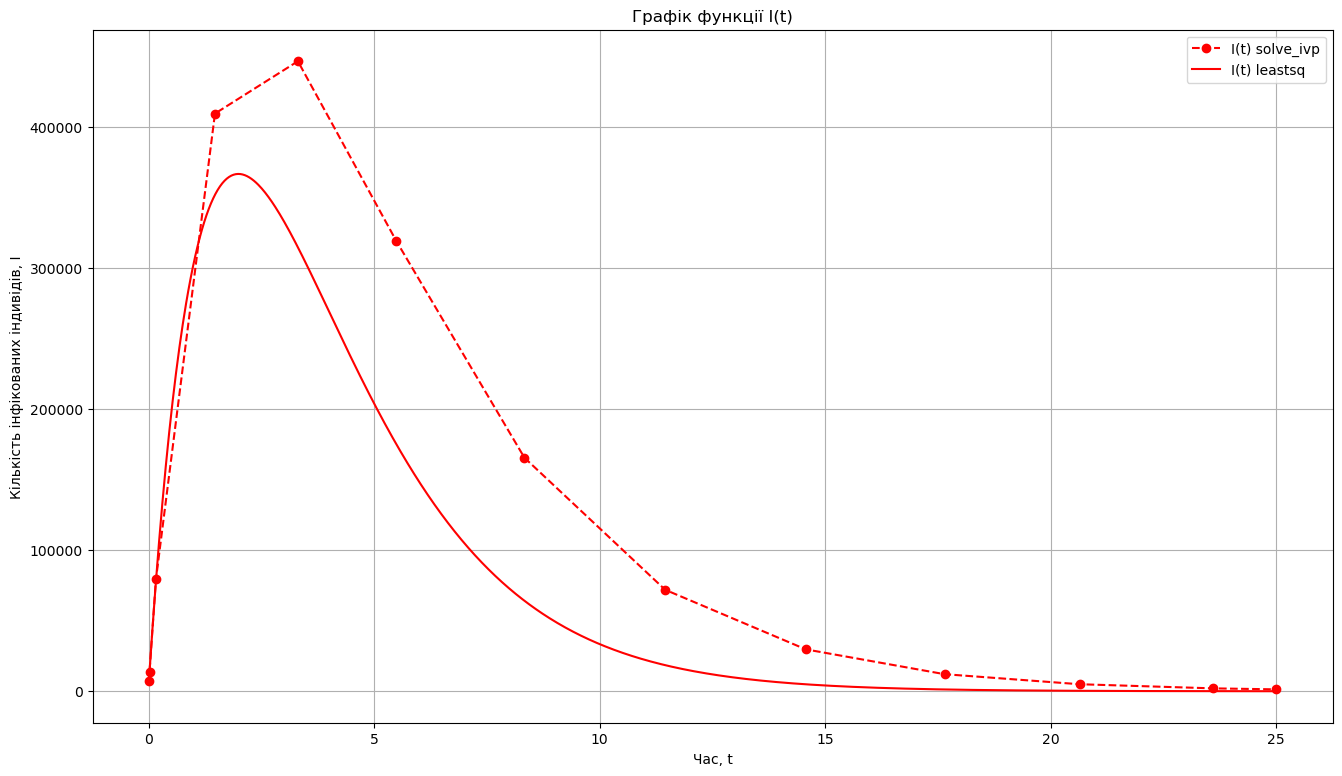

In [15]:
plt.figure(figsize=(16, 9))
plt.plot(sol_inf.t, sol_inf.y[0], 'ro--', label= 'I(t) solve_ivp')
plt.plot(t, y2_aprx, 'r', label= 'I(t) leastsq')
plt.grid()
plt.legend()
plt.title('Графік функції I(t)')
plt.ylabel('Кількість інфікованих індивiдів, I')
plt.xlabel('Час, t');

***

In [16]:
sol_inf_interp = sol_inf.sol(sol_sus.t)
R = N - sol_sus.y[0] - sol_inf_interp[0]
R_i = interp1d(sol_sus.t, R, kind='linear')

In [17]:
y3 = np.array(N - (y1 + y2))

In [18]:
y3_aprx = np.array(N - (y1_aprx + y2_aprx))

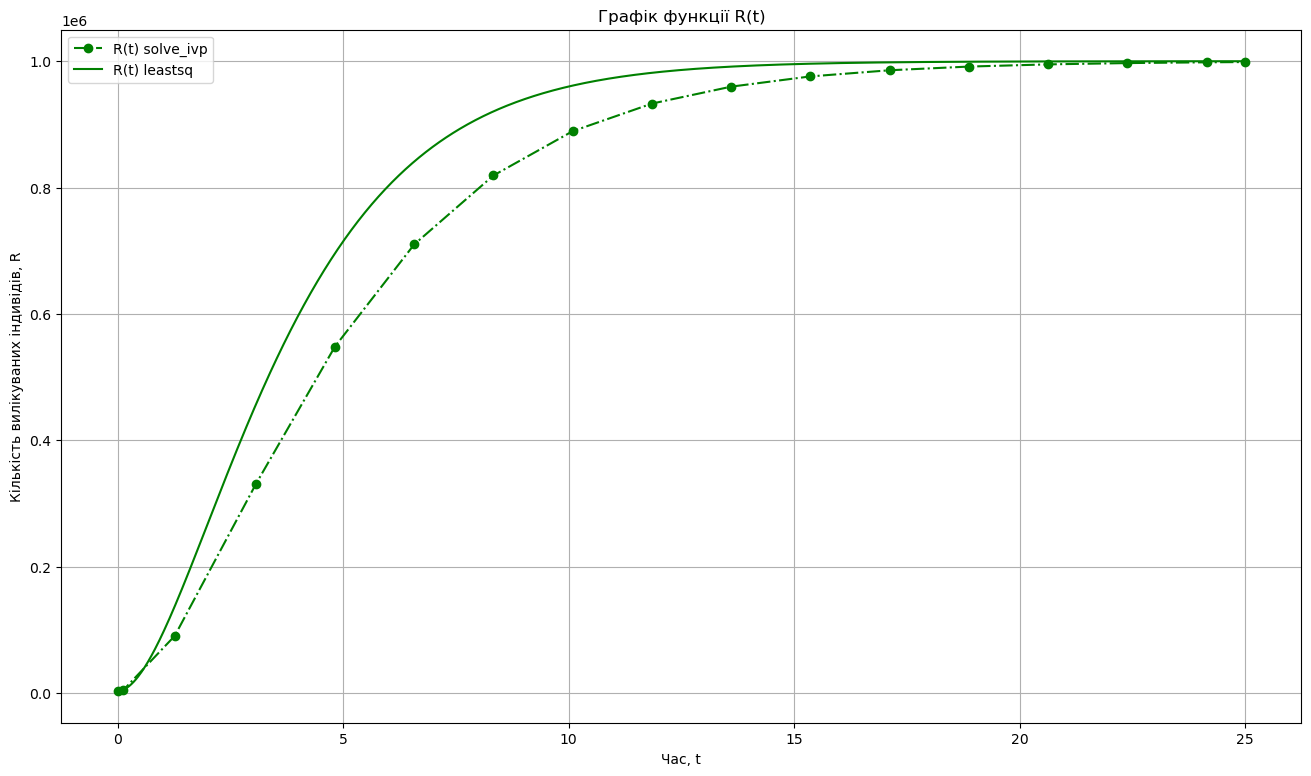

In [19]:
plt.figure(figsize=(16, 9))
plt.plot(sol_sus.t, R_i(sol_sus.t), 'go-.', label='R(t) solve_ivp')
plt.plot(t, y3_aprx, 'g', label='R(t) leastsq')
plt.grid()
plt.legend()
plt.title('Графік функції R(t)')
plt.ylabel('Кількість вилікуваних індивiдів, R')
plt.xlabel('Час, t');

***

**Побудувати всі три графіки $S(t)$, $I(t)$ і $R(t)$ на одній області відображення, отримані методом найменших квадратів**

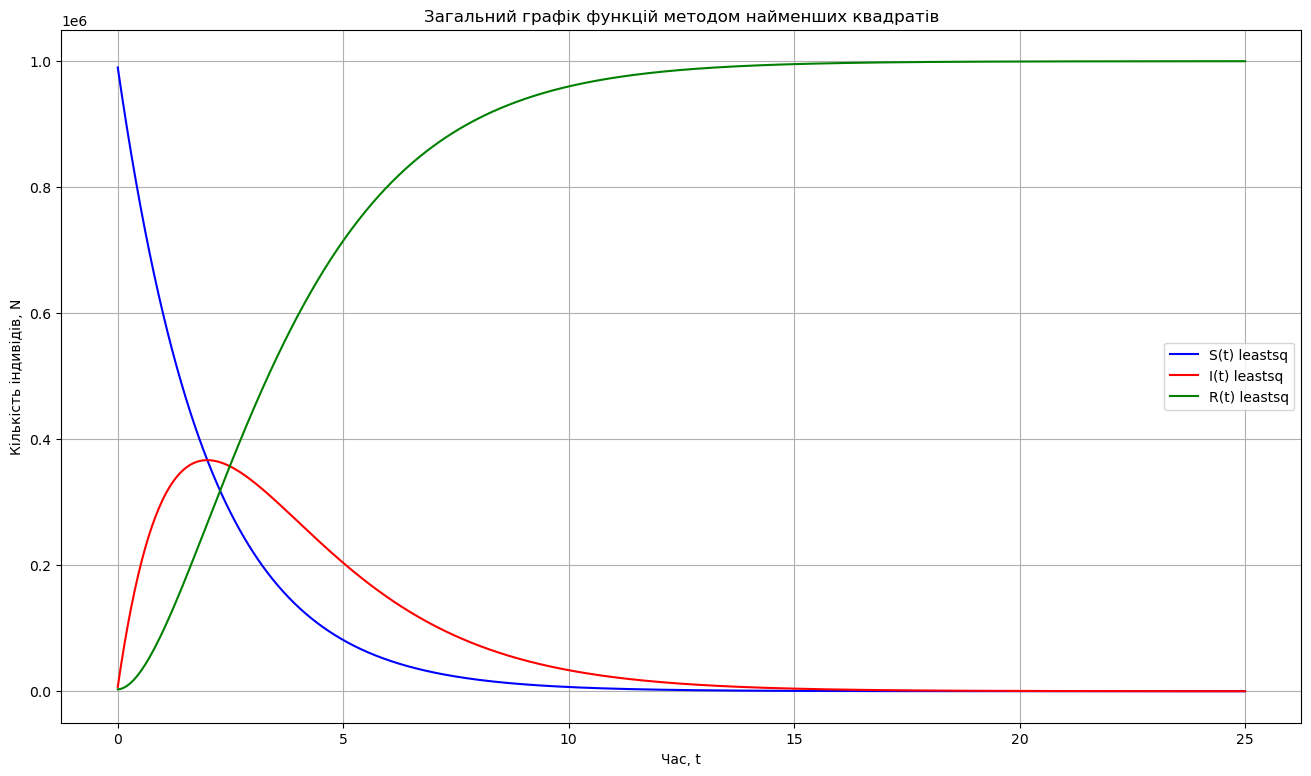

In [20]:
plt.figure(figsize=(16, 9))

plt.plot(t, y1_aprx, 'b', label='S(t) leastsq')
plt.plot(t, y2_aprx, 'r', label='I(t) leastsq')
plt.plot(t, y3_aprx, 'g', label='R(t) leastsq')

plt.legend()
plt.grid()
plt.title('Загальний графік функцій методом найменших квадратів')
plt.ylabel('Кількість індивідів, N')
plt.xlabel('Час, t');

***

**Знайти час $t_{max}$, за якого кількість інфекційних індивідів максимальна. Потрібно за допомогою методу `minimize_scalar` знайти, коли функція $I(t)$ досягає свого максимуму**

In [21]:
result = minimize_scalar(lambda t, alp: -It(t, alp), bracket=(0,5), args=(aprx2,))

t_max = np.round(result['x'][0], 3)
y_inf = np.round(It(t_max, aprx2[0]), 3)
print(f'Час 𝑡_𝑚𝑎𝑥 , за якого кількість інфекційних індивідів максимальна становить {t_max}')

Час 𝑡_𝑚𝑎𝑥 , за якого кількість інфекційних індивідів максимальна становить 1.986


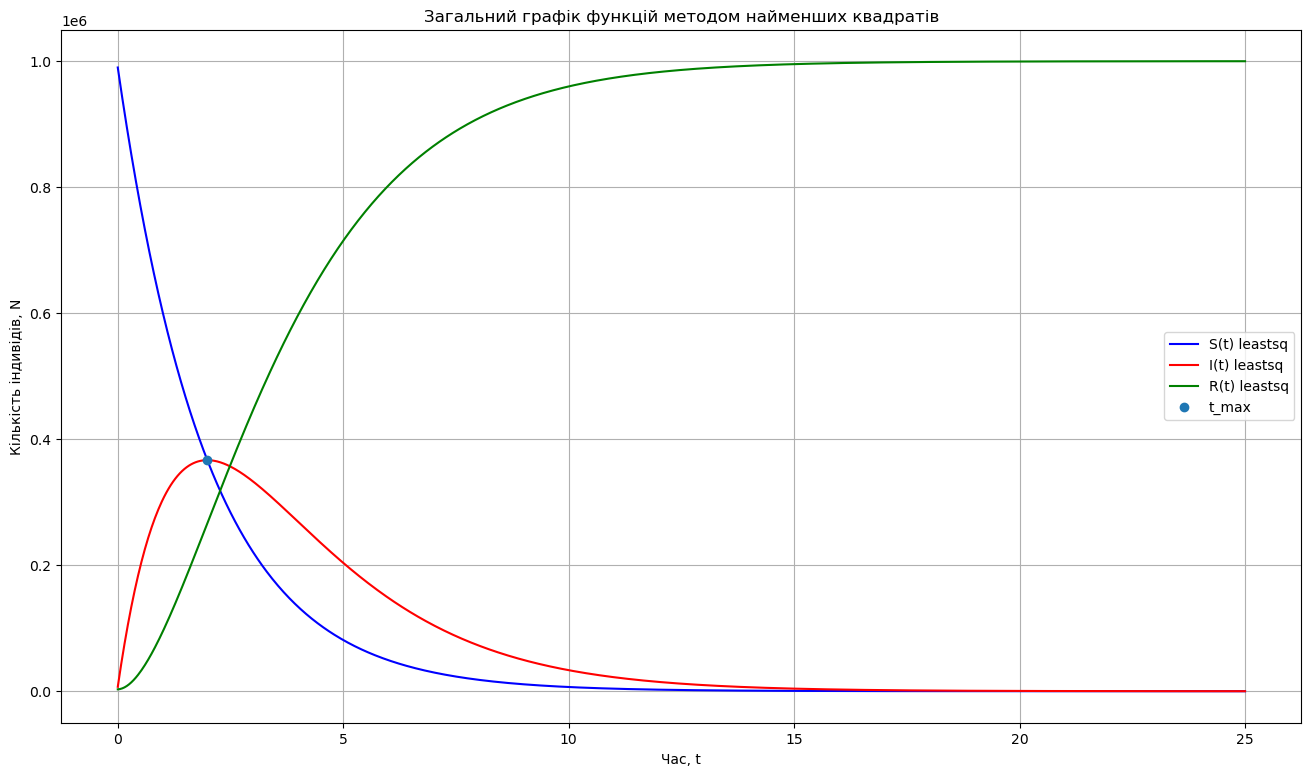

In [22]:
plt.figure(figsize=(16, 9))

plt.plot(t, y1_aprx, 'b', label='S(t) leastsq')
plt.plot(t, y2_aprx, 'r', label='I(t) leastsq')
plt.plot(t, y3_aprx, 'g', label='R(t) leastsq')
plt.plot(t_max, y_inf, 'o', label='t_max')
plt.legend()
plt.grid()
plt.title('Загальний графік функцій методом найменших квадратів')
plt.ylabel('Кількість індивідів, N')
plt.xlabel('Час, t');